 
#  Stock Performance NASDAQ


### Table of Content
1. [Select Securities and Time Intervals](#symbols)<br>
<br>
2. [Financial Information](#yf_ticker) - download with `yf.Ticker(x).info`<br>
<br>
3. [Percentage Returns](#yf_download)<br>
    3.1 [Download Historical Prices](#yf_download_price) - bulk download `yf.download`<br>
    3.2 [Download Dividend Data](#yf_download_div) - download with `yf.Ticker(x).dividends`<br>
    3.3 [Calculate Percentage Returns](#yf_download_ret) - calculate with `df.pct_change`<br>
    3.4 [Clean-Up Return's Dataframe](#yf_download_clean)<br>
<br>
4. [Performance Analysis](#perf)<br>
    4.1 [Performance - YEARLY](#perf_yr)<br>
    4.2 [Performance - MONTHLY](#perf_mh)<br>
    4.3 [Performance - WEEKLY](#perf_wk)<br>
    4.4 [Performance - DAILY](#perf_dy)<br>
<br>
5.  [Financial Markets and Investment Overview](#stock_markets)<br>
    5.1  [Financial Markets](#fin_markets)<br>
    5.2  [Market Indexes](#market_index)<br>
    5.3  [Financial Instruments](#fin_inst)<br>
    5.4  [Investment Instruments](#inv_inst)<br>


---


<font size="4"></font>


---
### Import Libraries

In [1]:
import pandas   as pd             # dataframe
import seaborn  as sns            # plots
import matplotlib.pyplot as plt   # plots
import yfinance as yf         # import Yahoo! Finance

Use `!pip install yfinance` to install Yahoo! Finance.

---
<a id="symbols"></a>
# 1.  Select Securities and Time Period

---

### Parameters in this Notebook:
<span style="color:blue"><font size="4">This is the only section where paramerters are set.</font></span>
- set `ticker`
- set `yf_period`
- set `yf_interval`

|  parameter | description | | user input required |
| :--- | :--- | :--- | :---: |
| **ticker** | stocks to analyze | `list` | yes |
| **market_index** | US market indexes | `list` | no |
| **symbols** | = ticker + market indexes | `list` | no |
| **fin_info** | financial information  | `list` | no |
| **yf_period** | span of time to investigate | `constant` | yes |
| **yf_interval** | increments within yf_period | `constant` | yes |

---

### DataFrames Created in this Notebook:

- download securities information `yf_info`
- download historical prices `yf_returns`
- download dividend data `yf_divdend`

|  DataFrame | Description | library | method | download time |
| :--- | :--- | :--- | :--- | :---: |
| **yf_info** | financial information  | **yfinance** | `yf.Ticker.info()`| < 2 min. |
| **yf_returns** | historical prices  | **yfinance** | `yf.download()` | < 1 min. |
| **yf_returns** | percentage change | **pandas** | `.pct_change()` | - from `yf_returns` |
| **yf_divdend** | dividend payouts  | **yfinance** | `yf.Ticker.dividends()` | < 1 min. |
||||||
| **perf_yr** | annual information | **pandas** | `.groupby(YEAR)` |  |
| **perf_mh** | monthly information | **pandas** | `.groupby(YEAR-MONTH)` |  |
| **perf_wk** | weekly information | **pandas** | `.groupby(YEAR-WEEK)` |  |
| **perf_dy** | daily information | **pandas** | | - same as `yf_returns` |

---

In [2]:
#  SET ticker, yf_period and yf_interval
#  ticker - securities to download
ticker      = ["amzn", "FBgrx", "qqq", "VBTLX", 'twtr', 'FLT', '^dji']

#  set market indexes to compare equities with
market_index = ['^DJI', '^IXIC', '^GSPC']  # Dow Jones, Nasdaq and S&P500

#  time period and interval
yf_period   = "20y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo



#  print set parameters
print('TICKER:\t\t{}'.format(ticker))
print('MARKET INDEX:\t{}'.format(market_index))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

TICKER:		['amzn', 'FBgrx', 'qqq', 'VBTLX', 'twtr', 'FLT', '^dji']
MARKET INDEX:	['^DJI', '^IXIC', '^GSPC']
PERIOD:		20y
INTERVAL:	1d


---

<span style="color:b"><font size="5">SYMBOLS = MARKET INDEXES + TICKER</font></span>

In [3]:
#  1.  uppercase and sort ticker
ticker = [x.upper() for x in ticker]
ticker.sort()


#  2.  set market indexes
market_index = ['^DJI', '^IXIC', '^GSPC']  # Dow Jones, Nasdaq and S&P500


#  3.  remove markets from ticker for plots, returns
for market in market_index:
    if market in ticker:
        ticker.remove(market)


#  4.  symbols = market_indexes + ticker
symbols = []   # initialize list
symbols = ticker + market_index


#  print set parameters
print('\nSYMBOLS (ticker + market index):\n{}'.format(symbols))


SYMBOLS (ticker + market index):
['AMZN', 'FBGRX', 'FLT', 'QQQ', 'TWTR', 'VBTLX', '^DJI', '^IXIC', '^GSPC']


[go to top](#top)

---
<a id="yf_ticker"></a>
# 2.  Financial Information
The **yf.Ticker** method gives general information about the symbol, such as name, sector, EPS, PE, market capitalization, etc.  See below for [full list](#parameters) of parameters.

Steps:
1.  Select the information parameters, `fin_parameters` to download
2.  Download symbol information using `yf.Ticker`
3.  Create the dataframe, `yf_info`

In [4]:
#  set parameters to download
fin_info = ["shortName", "sector", "industry", "quoteType", "exchange", "totalAssets", "marketCap", "beta", "trailingPE", "volume", "averageVolume", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "dividendRate", "phone"]

#  create dataframe
yf_info = pd.DataFrame(index = fin_info, columns = symbols)

for i in symbols:
    l = []             # initialize
    x = yf.Ticker(i)   # get ticker info
    for j in fin_info:
        if 'date' in j.lower():
            d = pd.to_datetime(x.info[j])
            if d is not None:
                l.append(d.strftime("%Y-%m-%d"))  # format date
        else:
            try:      # some parameters error
                l.append(x.info[j])
            except:   # ignore error and continue
                l.append("")
    yf_info[i] = l
    print('{}\t- financial information downloaded'.format(i))


yf_info

AMZN	- financial information downloaded
FBGRX	- financial information downloaded
FLT	- financial information downloaded
QQQ	- financial information downloaded
TWTR	- financial information downloaded
VBTLX	- financial information downloaded
^DJI	- financial information downloaded
^IXIC	- financial information downloaded
^GSPC	- financial information downloaded


,AMZN,FBGRX,FLT,QQQ,TWTR,VBTLX,^DJI,^IXIC,^GSPC
shortName,"Amazon.com, Inc.",Fidelity Blue Chip Growth Fund,"FleetCor Technologies, Inc.","Invesco QQQ Trust, Series 1","Twitter, Inc.",Vanguard Total Bond Market Inde,Dow Jones Industrial Average,NASDAQ Composite,S&P 500
sector,Consumer Cyclical,,Technology,,Communication Services,,,,
industry,Internet Retail,,Software—Infrastructure,,Internet Content & Information,,,,
quoteType,EQUITY,MUTUALFUND,EQUITY,ETF,EQUITY,MUTUALFUND,INDEX,INDEX,INDEX
exchange,NMS,NAS,NYQ,NGM,NYQ,NAS,DJI,NIM,SNP
totalAssets,None,,None,169488711680,None,316200812544,None,None,None
marketCap,1103130918912,None,17038178304,None,35763671040,None,None,None,None
beta,1.119607,,1.310784,None,0.80147,None,None,None,None
trailingPE,52.01353,,22.052053,3.953233,167.14285,,,,
volume,2597266,,232453,55545152,9862062,None,165694385,2290407000,3073865000


*table above can be reworded as:*<br>

**MARKET INDEXES**
* **Dow Jones Industrial Average** `^DJI` is a US market index
* **S&P 500** `^GSPC` is a US market index
* **NASDAQ Composite** `^IXIC` is a US market index
<br>

**EQUITY**
*  **Amazon.com, Inc.** `AMZN` is an **equity** in the **consumer cyclical** sector and **internet retail** industry with a **market capitalization** of \\$1,2 Trillion.  The stock has been trading for the past year with an **average daily volume** of 3.6 million shares, with **share prices** ranging between \\$2367 and \\$3773.
<br>
*  **FleetCor Technologies, Inc.** `FLT` is an **equity** in the **Technology** sector and **Software Infrastructure** industry with a **market capitalization** of \\$16.7 Billion.  The stock has been trading for the past year with an **average daily volume** of half-a-millionn shares, with **share prices** ranging between \\$200 and \\$282.
<br>
*  **Twitter, Inc.** `TWTR` is an **equity** in the **Communication Services** sector and **Communication Services** industry with a **market capitalization** of \\$36.9 Billion.  The stock has been trading for the past year with an **average daily volume** of 51 Million shares, with **share prices** ranging between \\$31 and \\$73.
<br>

**EXCHANGE-TRADED FUND (ETF)**
*  Invesco QQQ Trust, Series 1 (**QQQ**) is an **ETF** with \\$196 Billion in assets.  The fund has been trading for the past year with **share prices** ranging between \\$290 and \\$410.
<br>

**MUTUAL FUND**
*  **Fidelity Blue Chip Growth Fund** `FBGRX` is a **mutual fund**.  No other information is available at this time.
<br>
*  **Vanguard Total Bond Market** `VBTLX` is a **mutual fund** with $316 Billion in assets.
<br>

**CRYPTOCURRENCY** (example)
*  Bitcoin USD (**BTC-USD**) is a **cryptocurrency** with a **market capitalization** of \\$ 715 Billion.  The stock has been trading for the past year with an **average daily volume** of 27 Billion shares, with **share prices** ranging between \\$28,000 and \\$68,000.  Bitcoin is traded 24-hours a day, 7-days a week.

---
<a id="parameters"></a>
###  Yahoo! Finance Financial Information Parameter List
**yf.Ticker(symbol).info**  will give a full list of the parameters.

In [5]:
amzn = yf.Ticker('AMZN').info
ticker_parameter = pd.DataFrame(amzn).transpose()
ticker_parameter = ticker_parameter.reset_index() 
ticker_parameter.rename(columns={'index':'PARAMETERS'}, inplace=True)
ticker_parameter.sort_values(by=['PARAMETERS'],inplace=True)
ticker_parameter.reset_index(drop=True, inplace=True)

# remove ".head" to see the full list
print(ticker_parameter.sample(10))
print('\nAmazon (AMZN) has yf.Ticker parameters available: ', len(ticker_parameter))

                   PARAMETERS
79   morningStarOverallRating
125               strikePrice
64                lastCapGain
115         sharesOutstanding
103      regularMarketDayHigh
91                   pegRatio
67                 lastMarket
108       regularMarketVolume
124                     state
150                     yield

Amazon (AMZN) has yf.Ticker parameters available:  153


[go to top](#top)

---
<a id="yf_download"></a>
# 3.  Percentage Returns
Download the tickers historical prices and dividends, as well as the market index values, and create a dataframe with percentage returns.

- download historical prices `yf_returns`
- download dividend data `yf_divdend`
- create dataframe with percentage returns `yf_returns`

---
<a id="yf_download_price"></a>
##  3.1  Download Historical Prices
**yf.download** is used to get the historical prices of several securities for the time period `yf_period` with specified intervals `yf_interval`.

**Steps:**
1.  Create dataframe **yf_price** with **yf.download**
2.  Select `Close` column only (price at market close) 
3.  Remove the dataframe `multi-index`
4.  Calculate percentage changes with `pct_change`

In [6]:
#  print set parameters
print('SYMBOLS:\n{}\n'.format(symbols))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

SYMBOLS:
['AMZN', 'FBGRX', 'FLT', 'QQQ', 'TWTR', 'VBTLX', '^DJI', '^IXIC', '^GSPC']

PERIOD:		20y
INTERVAL:	1d


In [7]:
#  1.  Create dataframe yf_price with yf.download
yf_returns = yf.download(
        tickers = symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by intervaal
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy


#  2.  Select 'Close' (price at market close) column only
yf_returns = yf_returns.iloc[:, yf_returns.columns.get_level_values(1)=='Close']


#  3.  Remove the dataframe multi-index
yf_returns.columns = yf_returns.columns.droplevel(1)  # multi-index


yf_returns.tail(10)

[*********************100%***********************]  9 of 9 completed


,AMZN,^IXIC,VBTLX,QQQ,FLT,^GSPC,FBGRX,TWTR,^DJI
Date,,,,,,,,,
2022-04-26,2787.820068,12490.740234,10.15,317.140015,246.509995,4175.200195,138.690002,49.680000,33240.179688
2022-04-27,2763.340088,12488.929688,10.11,316.760010,251.699997,4183.959961,138.520004,48.639999,33301.929688
2022-04-28,2891.929932,12871.530273,10.10,328.010010,259.070007,4287.500000,143.850006,49.110001,33916.390625
2022-04-29,2485.629883,12334.639648,10.04,313.250000,249.520004,4131.930176,137.649994,49.020000,32977.210938
2022-05-02,2490.000000,12536.019531,9.98,318.480011,248.380005,4155.379883,140.130005,49.139999,33061.500000
2022-05-03,2485.070068,12563.759766,10.00,318.820007,248.839996,4175.479980,140.029999,48.869999,33128.789062
2022-05-04,2518.570068,12964.860352,10.05,329.600006,254.100006,4300.169922,143.619995,49.060001,34061.058594
2022-05-05,2328.139893,12317.690430,9.97,313.000000,243.679993,4146.870117,135.669998,50.360001,32997.968750
2022-05-06,2295.449951,12144.660156,9.93,309.250000,224.259995,4123.339844,133.529999,49.799999,32899.371094


In [8]:
print('shape: ', yf_returns.shape)

shape:  (5035, 9)



###   Percentage Change
Percent change in prices is much more meaningful than the dollar value.  Using pandas `.pct_change` method to get the returns.

\begin{align*} 
\mathsf{\frac{price_{2}-price_{1}}{price_{1}}} \times  100
\end{align*}

In [9]:
#  4.  calculate percentage changes with "pct_change()"
#  multiply by 100 to get percentage value
#  round off the percentages to 2 decimal points
yf_returns = round(yf_returns.pct_change()*100, 2)


yf_returns.tail(10)

,AMZN,^IXIC,VBTLX,QQQ,FLT,^GSPC,FBGRX,TWTR,^DJI
Date,,,,,,,,,
2022-04-26,-4.58,-3.95,0.40,-3.77,-2.13,-2.81,-4.06,-3.91,-2.38
2022-04-27,-0.88,-0.01,-0.39,-0.12,2.11,0.21,-0.12,-2.09,0.19
2022-04-28,4.65,3.06,-0.10,3.55,2.93,2.47,3.85,0.97,1.85
2022-04-29,-14.05,-4.17,-0.59,-4.50,-3.69,-3.63,-4.31,-0.18,-2.77
2022-05-02,0.18,1.63,-0.60,1.67,-0.46,0.57,1.80,0.24,0.26
2022-05-03,-0.20,0.22,0.20,0.11,0.19,0.48,-0.07,-0.55,0.20
2022-05-04,1.35,3.19,0.50,3.38,2.11,2.99,2.56,0.39,2.81
2022-05-05,-7.56,-4.99,-0.80,-5.04,-4.10,-3.56,-5.54,2.65,-3.12
2022-05-06,-1.40,-1.40,-0.40,-1.20,-7.97,-0.57,-1.58,-1.11,-0.30


[go to top](#top) 

---
<a id="yf_download_div"></a>
##  3.2 Download Dividend Percentages
Dividends is a sum of money paid regularly by a company to its shareholders out of its profits.  Not all companies pay out dividends.

In [10]:
yf_divdend = pd.DataFrame()   # initialize dataframe

for i in ticker:
    if i != market_index:
        x = pd.DataFrame(yf.Ticker(i).dividends)
        x = x.rename(columns={"Dividends":i})
        yf_divdend = pd.concat([yf_divdend,x], axis=1)
        if len(x) > 0:
            print('{:>8}\t- dividends'.format(i))
        else:
            print('{:>8}\t- no dividends'.format(i))             


#  match dates in yf_returns (first return data to now)
yf_divdend = yf_divdend[yf_divdend.index >= yf_returns.index[0]]


#  print out dividends
print("\n",yf_divdend.tail(10))

    AMZN	- no dividends
   FBGRX	- dividends
     FLT	- no dividends
     QQQ	- dividends
    TWTR	- no dividends
   VBTLX	- dividends

             AMZN  FBGRX  FLT    QQQ  TWTR  VBTLX
Date                                            
2020-12-22   NaN    NaN  NaN    NaN   NaN  0.019
2020-12-31   NaN    NaN  NaN    NaN   NaN  0.019
2021-01-29   NaN    NaN  NaN    NaN   NaN  0.019
2021-02-26   NaN    NaN  NaN    NaN   NaN  0.017
2021-03-22   NaN    NaN  NaN  0.395   NaN    NaN
2021-03-31   NaN    NaN  NaN    NaN   NaN  0.025
2021-04-30   NaN    NaN  NaN    NaN   NaN  0.017
2021-05-28   NaN    NaN  NaN    NaN   NaN  0.018
2021-06-21   NaN    NaN  NaN  0.397   NaN    NaN
2021-06-30   NaN    NaN  NaN    NaN   NaN  0.017


###  Dividend Analysis:
-  not all companies have dividend payouts
-  dividend payouts are typically less than 5%
-  FBGRX, QQQ and VBTLX have some dividend payouts


[go to top](#top) 

---
<a id="yf_download_div"></a>
##  3.3 Calculate Percentage Returns
Add returns and dividend dataframes.  

<span style="color:b"><font size="5">yf_returns = yf_returns + yf_divdend</font></span>

Basically, we're doing:

\begin{align*} 
\mathsf{\text{Percentage Return} =  \frac{price_{2}-price_{1}}{price_{1}}} \times  100 + dividends (\%)
\end{align*}

In [11]:
yf_returns = yf_returns.add(yf_divdend, fill_value = 0)

yf_returns.tail(5)

,AMZN,FBGRX,FLT,QQQ,TWTR,VBTLX,^DJI,^GSPC,^IXIC
Date,,,,,,,,,
2022-05-03,-0.20,-0.07,0.19,0.11,-0.55,0.2,0.20,0.48,0.22
2022-05-04,1.35,2.56,2.11,3.38,0.39,0.5,2.81,2.99,3.19
2022-05-05,-7.56,-5.54,-4.10,-5.04,2.65,-0.8,-3.12,-3.56,-4.99
2022-05-06,-1.40,-1.58,-7.97,-1.20,-1.11,-0.4,-0.30,-0.57,-1.40
2022-05-09,-5.21,-5.53,-3.41,-3.91,-3.69,0.4,-1.99,-3.20,-4.29


---
<a id="yf_download_clean"></a>
##  3.4 Clean-Up Return's Dataframe
Return's dataframe `yf_returns` involves:
1. re-order columns
2. rename market index columns
3. update `market_index` with market names
4. update `symbols` list with market names

In [12]:
#  1. re-order columns
col_order = []

for i in market_index:
    col_order.append(i)  # add markets

for i in ticker:
    col_order.append(i)  # add tickers

yf_returns = yf_returns[col_order]   # reorder columns


#  2. rename market index columns
yf_returns.rename(columns = {'^DJI':'DowJones', '^GSPC':'S&P500', '^IXIC':'Nasdaq'}, inplace = True)


#  3. update 'market_index' with market names
market_index = sorted(['DowJones', 'S&P500', 'Nasdaq'])


#  4. update `symbols` list with market names
symbols[symbols.index('^DJI')]  = 'DowJones'
symbols[symbols.index('^GSPC')] = 'S&P500'
symbols[symbols.index('^IXIC')] = 'Nasdaq'


print(yf_returns.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2002-05-10 to 2022-05-09
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DowJones  5034 non-null   float64
 1   Nasdaq    5034 non-null   float64
 2   S&P500    5034 non-null   float64
 3   AMZN      5034 non-null   float64
 4   FBGRX     5034 non-null   float64
 5   FLT       2868 non-null   float64
 6   QQQ       5034 non-null   float64
 7   TWTR      2139 non-null   float64
 8   VBTLX     5034 non-null   float64
dtypes: float64(9)
memory usage: 393.4 KB
None


[go to top](#top)     

---
<a id="perf"></a>
# 4  Performance Analysis
The stock prices and dividends have been downloaded and the percent changes have been caluculated.  Before we can begin the analysis, we need to create dataframes for the various time periods we want to analyze:

| dataframe | description | column | function |
| :--- | :--- | ---: | :--- |
| perf_dy | daily percentage change | `Date` | `= yf_returns` |
| perf_yr | total annual percentage change | `YEAR` | `groupby YEAR` |
| perf_mh | total monthly percentage change | `YEAR-MONTH` | `groupby MONTH` |
| perf_wk | total weekly percentage change | `YEAR-WEEK` | `groupby WEEK` |


### Performance Analysis:
[4.1 Performance - YEARLY](#perf_yr)<br>
[4.2 Performance - MONTHLY](#perf_mh)<br>
[4.3 Performance - WEEKLY](#perf_wk)<br>
[4.4 Performance - DAILY](#perf_dy)<br>

---

###  Create Performance Dataframes

In [13]:
#  create YEAR, MONTH, WEEK columns in perf_dy
perf_dy = yf_returns
perf_dy['YEAR']  = perf_dy.index.strftime("%Y")     # YEAR
perf_dy['MONTH'] = perf_dy.index.strftime("%Y-%m")  # YEAR-MONTH
perf_dy['WEEK']  = perf_dy.index.strftime("%Y-%U")  # YEAR-WEEK


#  create time dataframes using GROUPBY
perf_yr = perf_dy.groupby('YEAR').sum()
perf_mh = perf_dy.groupby('MONTH').sum()
perf_wk = perf_dy.groupby('WEEK').sum()


#  print index and column names
print("\nperf_dy:\n", perf_dy.index.name, perf_dy.columns.values)
print("\nperf_yr:\n", perf_yr.index.name, perf_yr.columns.values)
print("\nperf_mh:\n", perf_mh.index.name, perf_mh.columns.values)
print("\nperf_wk:\n", perf_wk.index.name, perf_wk.columns.values)


perf_dy:
 Date ['DowJones' 'Nasdaq' 'S&P500' 'AMZN' 'FBGRX' 'FLT' 'QQQ' 'TWTR' 'VBTLX'
 'YEAR' 'MONTH' 'WEEK']

perf_yr:
 YEAR ['DowJones' 'Nasdaq' 'S&P500' 'AMZN' 'FBGRX' 'FLT' 'QQQ' 'TWTR' 'VBTLX']

perf_mh:
 MONTH ['DowJones' 'Nasdaq' 'S&P500' 'AMZN' 'FBGRX' 'FLT' 'QQQ' 'TWTR' 'VBTLX']

perf_wk:
 WEEK ['DowJones' 'Nasdaq' 'S&P500' 'AMZN' 'FBGRX' 'FLT' 'QQQ' 'TWTR' 'VBTLX']


---
###  Create Function:  plotPerformance

In [14]:
#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    
    plt.figure(figsize=(10,8))

    #  subplot #1
    plt.subplot(221)
    df[market_index].boxplot()
    plt.title('market indexes')
    plt.ylabel('percent change')
    plt.xticks(rotation = 90)
    plt.grid(False)

    #  subplot #2
    plt.subplot(222)
    plt.plot(df[market_index])
    plt.title('market indexes')
    plt.legend(df[market_index], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    
    plt.show()  # plot subplots
    
    #  plot #3
    plt.figure(figsize=(10,6))
    df[ticker].boxplot()
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
    

    #  print returns
    print('\nRETURNS FROM {} TO {}:'.format(df.index[0], df.index[-1]))
    for i in market_index + ticker:
        print('{:>10}{:>10.2f}%'.format(i,df[i].sum()))

    return

print('function plotPerformance created')

function plotPerformance created


[go to top of section](#perf)

---
<a id="perf_yr"></a>
##  4.1 Performance - YEARLY
Plot and analyze the yearly performance for the past 10 years (past decade).

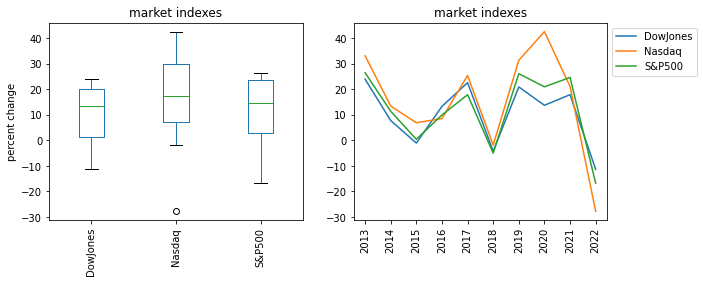

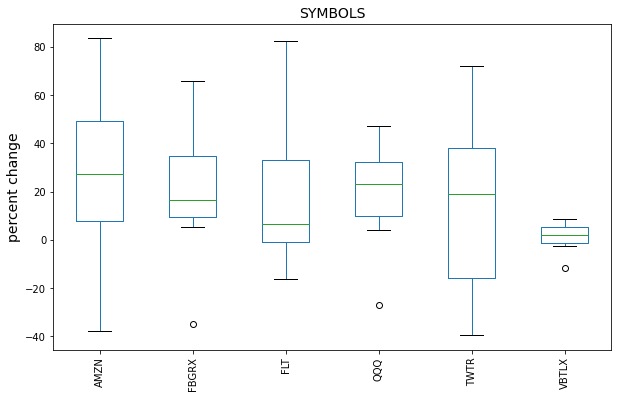

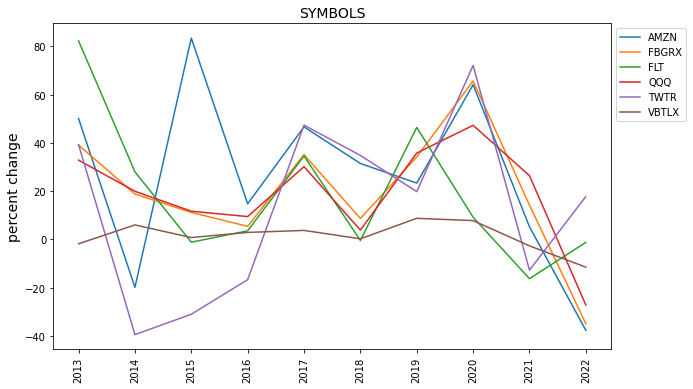


RETURNS FROM 2013 TO 2022:
  DowJones    103.84%
    Nasdaq    153.13%
    S&P500    116.41%
      AMZN    261.58%
     FBGRX    197.52%
       FLT    185.00%
       QQQ    190.36%
      TWTR    131.35%
     VBTLX     14.38%


In [15]:
plotPerformance(perf_yr.tail(10))  # past 10 years

### ANALYSIS - YEARLY (10 years)
`market index`
- **boxplot** - all three indexes stay within similar range, however, **S&P500** dips  more than the other two markets
- **lineplot** - all three markets following the same path.  Nasdaq did see a significant increase in 2019-2020.
- **returns** - all three markets doubled

`symbols`
- **boxplot** and **lineplots** - `AMZN` and `TWTR` are volitile, with significant percent changes.  `VBTLX` has a very tight range
- **returns** - `AMZN` had the best returns and all the securities beat the **S&P500** except `VBTLX`


[go to top of section](#perf)

---
<a id="perf_mh"></a>
##  4.2 Performance - MONTHLY
Plot and analyze the yearly performance for the past 24 months (2 years).

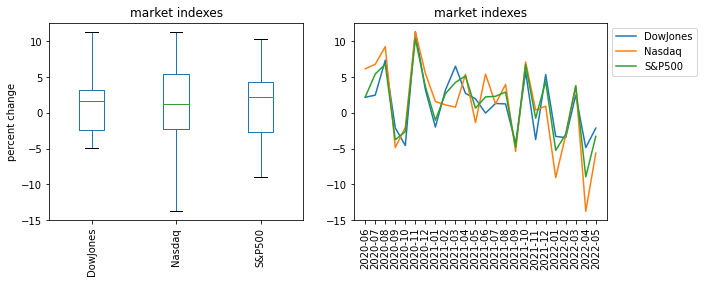

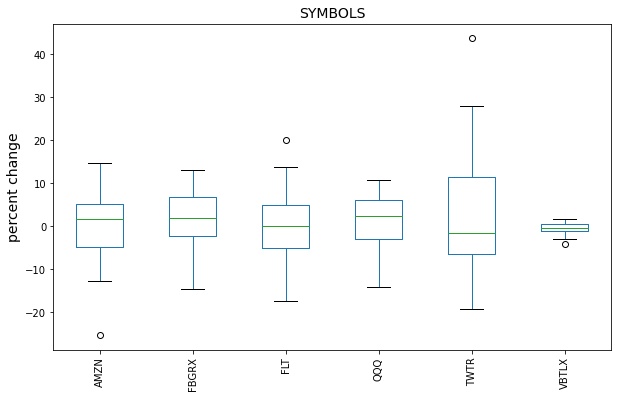

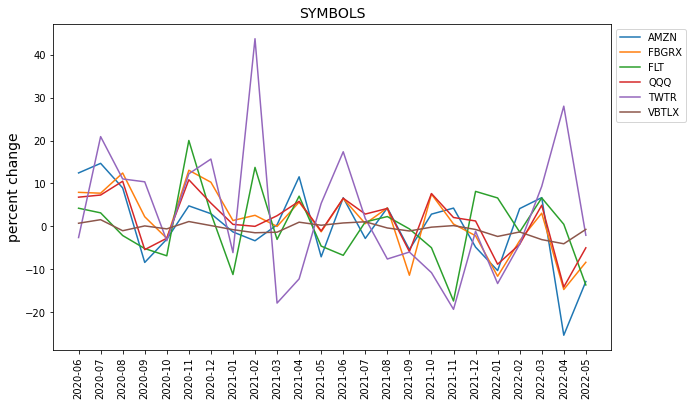


RETURNS FROM 2020-06 TO 2022-05:
  DowJones     26.52%
    Nasdaq     25.49%
    S&P500     29.97%
      AMZN      0.07%
     FBGRX     30.22%
       FLT     -1.18%
       QQQ     32.01%
      TWTR     69.40%
     VBTLX    -11.99%


In [16]:
plotPerformance(perf_mh.tail(24))  # past 24 months

### ANALYSIS - MONTHLY (24 months)
`market index`
- **boxplot** - all three indexes stay within similar range, however, **Nasdaq** was volitile
- **lineplot** - all three markets following the same path
- **returns** - all three markets returned over 25%

`symbols`
- **boxplot** and **lineplots** - `FLT` and `TWTR` are volitile, with significant percent changes.  `VBTLX` has a very tight range
- **returns** - `TWTR` had the best returns, with `FBGRX`, `QQQ` and `TWTR` beating the **S&P500**


[go to top of section](#perf)

---
<a id="perf_wk"></a>
##  4.3 Performance - WEEKLY
Plot and analyze the yearly performance for the past 26 weeks (6 months).

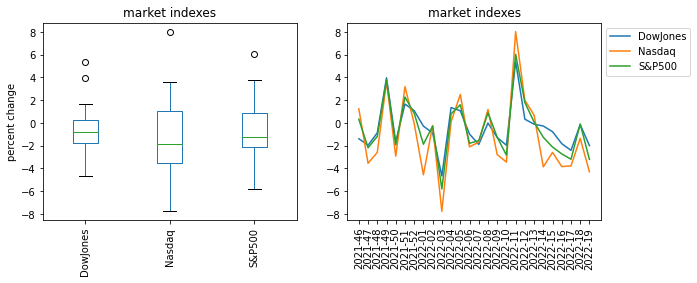

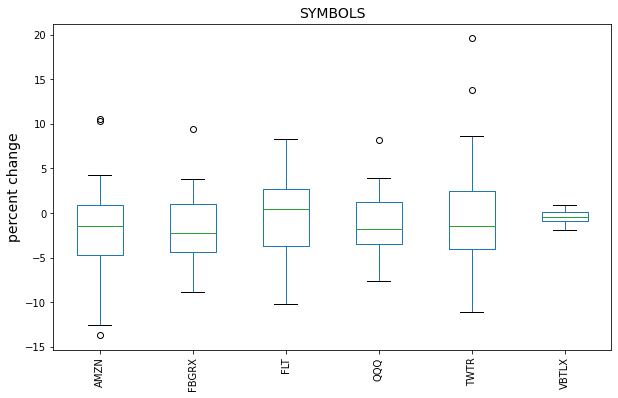

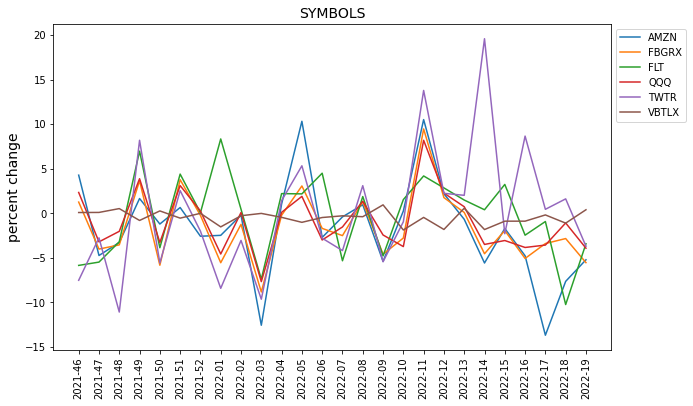


RETURNS FROM 2021-46 TO 2022-19:
  DowJones    -10.49%
    Nasdaq    -28.82%
    S&P500    -14.79%
      AMZN    -42.82%
     FBGRX    -39.86%
       FLT     -8.13%
       QQQ    -26.07%
      TWTR     -0.37%
     VBTLX    -11.82%


In [17]:
plotPerformance(perf_wk.tail(26))  # past 26 weeks

### ANALYSIS - WEEKLY (26 weeks)
`market index`
- **boxplot** - **Nasdaq** was volitile, but all three indexes had major swings (outliers)
- **lineplot** - all three markets following the same path
- **returns** - all three markets dipped

`symbols`
- **boxplot** - all securities performed poorly, with `AMZN`, `FBGRX` and `TWTR` experiencing wild swings (outliers)
- **lineplots** - all securities had swings
- **returns** - returns were bad for all securities


[go to top of section](#perf)

---
<a id="perf_dy"></a>
##  4.4 Performance - DAILY
Plot and analyze the yearly performance for the past 31 days (1 month).

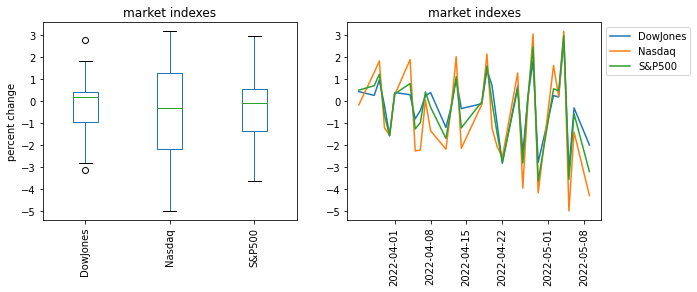

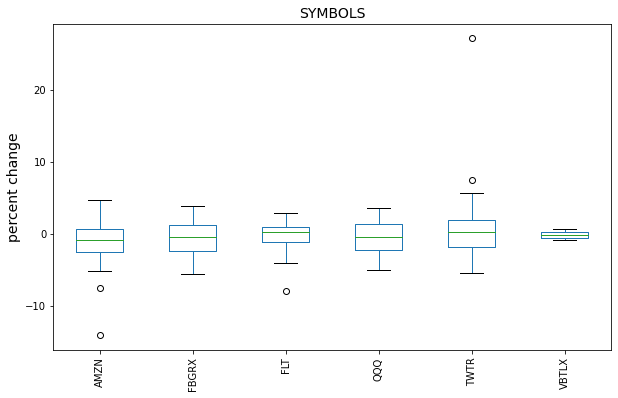

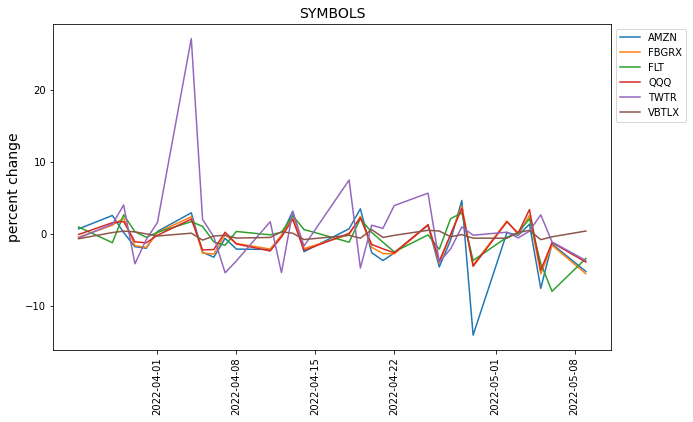


RETURNS FROM 2022-03-25 00:00:00 TO 2022-05-09 00:00:00:
  DowJones     -7.08%
    Nasdaq    -19.17%
    S&P500    -11.99%
      AMZN    -38.52%
     FBGRX    -23.63%
       FLT    -10.92%
       QQQ    -18.26%
      TWTR     25.78%
     VBTLX     -4.56%


In [18]:
plotPerformance(perf_dy.tail(31))  # past 31 days

### ANALYSIS - DAILY (31 days)
`market index`
- **boxplot** - **Nasdaq** was volitile, but all three indexes had major swings (outliers)
- **lineplot** - all three markets following the same path
- **returns** - all three markets dipped

`symbols`
- **boxplot** - all securities performed poorly, with `TWTR` experiencing wild swings (outliers)
- **lineplots** - all securities had swings,  with `TWTR` having the most
- **returns** - returns were bad for all securities except `TWTR`


[go to top of section](#perf)


**Generally speaking** securities that follow or out-perform the **S&P500** are generally good long-term investments.

[go to top](#top)

---
<a id="stock_markets"></a>
#  5.  Financial Markets and Investment Overview
* All trading occurs in **financial markets** and the performances of the various components of the financial markets are measured by **market indexes**
* **Financial** and **Investment Instruments** are traded in the financial markets and overall performances is tracked on the market indexes


<a id="fin_markets"></a>
##  5.1  Financial Markets
Following are some of the major stock markets and their market capitalizations:

|  STOCK EXCHANGE  |  SYMBOL  |  CITY  |  MARKET CAP 2019 (\$B) | 
| :--- | :---: | :--- | ---: |
| New York Stock Exchange | NYSE | New York City | 22,923 |
| Nasdaq | NASDAQ | New York City | 10,857 |
| Japan Exchange Group | JPX | Tokyo | 5,679 |
| Shanghai Stock Exchange | SSE | Shanghai | 4,026 |
| Hong Kong Stock Exchange | SEHK | Hong Kong | 3,936 |
| London Stock Exchange | LSE | London | 3,767 |
| Shenzhen Stock Exchange | SZSE | Shenzhen | 2,504 |
| TMX Group | TSX | Toronto | 2,095 |
| Bombay Stock Exchange | BSE | Mumbai | 2,056 |
| Australian Securities Exchange | ASX | Sydney | 1,328 |
| Ho Chi Minh Stock Exchange | HSX | Ho Chi Minh | 128 |
| Pakistan Stock Exchange | PSX | Karachi | 54  |


<a id="market_index"></a>
##  5.2  Market Indexes
Following are the major market indexes:

|  MARKET INDEX  |  SYMBOL |Description | 
| :--- | :--- | :--- | 
| **Dow Jones Industrial Average** | DJIA| or Dow, is an index that tracks the 30 largest, publicly owned companies trading on the New York Stock Exchange** | NYSE) and the NASDAQ. |
|**Nasdaq Composite** | IXIC| or Nasdaq, is an index of more than 3,000 stocks listed on the Nasdaq exchange. |
|**Standard & Poor's 500 Index** | GSPC| or S&P 500, is an index of the 500 largest U.S. publicly traded companies. The index is widely regarded as the best gauge of large-cap U.S. equities. S&P500 is the **market benchmark**. |
|**CBOE Volatility Index10** | VIX | is a real-time market index that represents the market's expectation of 30-day forward-looking volatility and is derived from the price inputs of the S&P500 index options. It is also known by "Fear Gauge" or "Fear Index." |
|**Financial Times Stock Exchange 100 Share Index** | FTSE |or *Footsie*, is the dominant index, containing 100 of the top blue chips on the London Stock Exchange. |
|**Nikkei Index** | N225 | is composed of Japan's top 225 blue-chip companies traded on the Tokyo Stock Exchange. |
|**Hang Seng Index** | HSI | is an index of the largest companies that trade on the Hong Kong Exchange. |
|**Sensex** | BSESB | also known as the S&P BSE Sensex index, is the benchmark index comprising of 30 of the largest and most actively-traded stocks on the Bombay Stock Exchange. |
|**Karachi Stock Exchange** | KSE-100 | consists of 100 companies representing about 90 percent of market capitalization of the Pakistan Stock Exchange. |


<a id="fin_inst"></a>
##  5.3  Financial Instruments
Financial instruments can also be referred to as **securities**, and typically comprise of:

|  SECURITY |Description | 
| :--- | :--- |
| **Stocks** | an ownership position in a publicly-traded corporation |
| **Bonds** | a creditor relationship with a governmental body or a corporation |
| **Derivative (Options)** | or rights to ownership – also called underlying financial instrument |


<a id="inv_inst"></a>
##  5.4  Investment Instruments
Investment vehicles are very popular and are securities packaged in **portfolios** to maximize gains and minimize risks.

|  INSTRUMENT |Description |  |
| :--- | :--- | |
| **Mutual Funds** | A mutual fund is a company that pools money from many investors and invests in securities such as stocks, bonds, and short-term debt (bonds). The combined holdings of the mutual fund are known as its *portfolio*. |
| **Exchange-Traded Funds (ETF)** |are in many ways similar to mutual funds, however, they are listed on exchanges and ETF shares trade throughout the day just like ordinary stock. |
| **Index and Sector Funds** |is similar to an ETF, except the index fund portfolio consists of securities listed on a particular market index (such as Nasdaq or S&P500). |
| **Hedge Funds** |have very aggressive portfolios and are very high-risk. Hedge-funds are tailored to high-end investor. |
| **Real Estate Investment Trusts (REITs)** |allow individuals to invest in large-scale, income-producing real estate. |
| **Certificate of Deposit (CD)** |is a savings account that holds a fixed amount of money for a fixed period of time, and are considered to be one of the safest savings option. |

[go to top of document](#top)     

---

# END